# Implementing the sentiment aggregator signal

First I will initialize the finbert model and test it on some headlines.

In [11]:
from model_utils import load_classification_model, load_classification_pipeline, load_model_embed, load_tokenizer, enc_device, embed, cosine

import torch

In [2]:
# MODEL_NAME = "ProsusAI/finbert"

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # load tokenizer + model
tokenizer = load_tokenizer()
model_classify = load_classification_model()
model_embed = load_model_embed()


model_classify.eval()

# build pipeline

finbert = load_classification_pipeline(model_classify, tokenizer)

# finbert = pipeline(
#     "sentiment-analysis",
#     model=model_classify,
#     tokenizer=tokenizer,
# )

Device set to use cpu


Now the model is initiazlied, try some cases.

In [3]:
texts = [
    "The company reported record earnings and raised its guidance for next quarter.",
    "Shares plummeted after the SEC announced a fraud investigation."
]

results = finbert(texts)

print(results)

[{'label': 'positive', 'score': 0.9534343481063843}, {'label': 'negative', 'score': 0.962225079536438}]


Now I will try to extract the last layer of the model to be able to determine whether the headlines are the same. AutoModel should be loaded and the model should be initialized with it only for the embedding layer extraction.

#### Remove creating model each call *

In [4]:
# def enc_device(enc):
#     for k, v in enc.items(): 
#        enc[k] = v.to(device) 

# def embed(text):
#     enc = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)

#     enc_device(enc)

#     with torch.no_grad():
#         out = model_embed(**enc)
#         return out.last_hidden_state[:, 0, :]

Then given the CLS vector, we use 

$$\cos{(\theta)} = \frac{a\cdot b}{\|a\|\|b\|}$$

If the angle is small then the vectors are in the similar direction otherwise not. If similar then the meaning is also similar. 

In [6]:
# def cosine(a, b):
#     return F.cosine_similarity(a, b).item()

h1 = "Nvidia released quarter 3 results"
h2 = "Third quarter result was released by Nvidia"

v1 = embed(h1, model_embed, tokenizer)
v2 = embed(h2, model_embed, tokenizer)

sim = cosine(v1, v2)
print("similarity:", sim)

similarity: 0.8903390169143677


In [7]:
# id2label = model_embed.config.id2label

# def get_sentimment_vector(text: str):
#     enc = tokenizer(text, return_tensors="pt", truncation=True, max_length=128)
#     with torch.no_grad():
#         out = enc


In [8]:
import requests
import pandas as pd

TOKEN = "d4fo8npr01qgiiemiebgd4fo8npr01qgiiemiec0"

url = "https://finnhub.io/api/v1/company-news"
params = {
    "symbol": "NVDA",
    "from": "2023-01-01",
    "to": "2024-12-31",
    "token": TOKEN,
}

resp = requests.get(url, params=params)
data = resp.json()

df = pd.DataFrame(data)
df.to_csv("nvda_finnhub_news.csv", index=False)

print(len(df))
df

247


,category,datetime,headline,id,image,related,source,summary,url
0,company,1735682139,Stocks To Watch in January—And What to Watch For,132219827,https://www.investopedia.com/thmb/47pQ3if_DjjT...,NVDA,Yahoo,Editors' Picks for Companies That Are Likely t...,https://finnhub.io/api/news?id=7f83ad63c6268b1...
1,company,1735680875,"Broadcom's chips, network will drive growth in...",132223600,https://s.yimg.com/ny/api/res/1.2/Wq17m687Cso7...,NVDA,Yahoo,Big Tech has dominated investor portfolios wit...,https://finnhub.io/api/news?id=7a165d23791610e...
2,company,1735674321,These Are The 5 Best Dow Jones Stocks Of 2024,132218396,,NVDA,Yahoo,"Led by Nvidia and Walmart, the best Dow Jones ...",https://finnhub.io/api/news?id=d6d5923db315fa6...
3,company,1735679760,These Stocks Moved the Most Today: Super Micro...,132221600,https://media.zenfs.com/en/Barrons.com/12ea0f4...,NVDA,Yahoo,"Super Micro stock declines, Nvidia trades lowe...",https://finnhub.io/api/news?id=86c1b27e46a5eb5...
4,company,1735679580,Stocks Cap Best Two Years in a Quarter-Century,132218950,,NVDA,Yahoo,Some investors caution against thinking that t...,https://finnhub.io/api/news?id=84a7f4553b61d77...
...,...,...,...,...,...,...,...,...,...
242,company,1735036429,"Analyst: ‘Dollars Are Flowing’ Into Nvidia, No...",132130092,https://s.yimg.com/ny/api/res/1.2/b3AkRHbzARzD...,NVDA,Yahoo,We recently published a list of Top 10 AI Stoc...,https://finnhub.io/api/news?id=8f30c7b5e4d67ec...
243,company,1735036200,"Don’t Look Now, but China’s AI Is Catching Up ...",132130093,,NVDA,Yahoo,Chinese artificial-intelligence startups are u...,https://finnhub.io/api/news?id=e720b3e6a00d9c1...
244,company,1735035900,3 No-Brainer Stocks to Buy on the Latest Sell-Off,132129785,https://g.foolcdn.com/editorial/images/801947/...,NVDA,Yahoo,Warren Buffett's mentor Benjamin Graham once s...,https://finnhub.io/api/news?id=b50ae7e79bf00d9...
245,company,1735035852,"Trending tickers: Nvidia, TSMC, Apple, Honda a...",132130096,https://s.yimg.com/ny/api/res/1.2/xi.ivMWadDPI...,NVDA,Yahoo,The latest investor updates on stocks that are...,https://finnhub.io/api/news?id=da11a0a20e8bf8d...


In [20]:
cols = [
    "headline",
    "datetime",
    "summary"
]
cols = [c for c in cols if c in df.columns]
df = df[cols]


df["datetime"] = pd.to_datetime(df["datetime"], unit="s")

df

/tmp/ipykernel_441959/2007750302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df["datetime"], unit="s")


,headline,datetime,summary
0,Stocks To Watch in January—And What to Watch For,2024-12-31 21:55:39,Editors' Picks for Companies That Are Likely t...
1,"Broadcom's chips, network will drive growth in...",2024-12-31 21:34:35,Big Tech has dominated investor portfolios wit...
2,These Are The 5 Best Dow Jones Stocks Of 2024,2024-12-31 19:45:21,"Led by Nvidia and Walmart, the best Dow Jones ..."
3,These Stocks Moved the Most Today: Super Micro...,2024-12-31 21:16:00,"Super Micro stock declines, Nvidia trades lowe..."
4,Stocks Cap Best Two Years in a Quarter-Century,2024-12-31 21:13:00,Some investors caution against thinking that t...
...,...,...,...
242,"Analyst: ‘Dollars Are Flowing’ Into Nvidia, No...",2024-12-24 10:33:49,We recently published a list of Top 10 AI Stoc...
243,"Don’t Look Now, but China’s AI Is Catching Up ...",2024-12-24 10:30:00,Chinese artificial-intelligence startups are u...
244,3 No-Brainer Stocks to Buy on the Latest Sell-Off,2024-12-24 10:25:00,Warren Buffett's mentor Benjamin Graham once s...
245,"Trending tickers: Nvidia, TSMC, Apple, Honda a...",2024-12-24 10:24:12,The latest investor updates on stocks that are...


In [9]:
df.columns

Index(['category', 'datetime', 'headline', 'id', 'image', 'related', 'source',
       'summary', 'url'],
      dtype='object')

In [10]:
df['headline'].values

array(['Stocks To Watch in January—And What to Watch For',
       "Broadcom's chips, network will drive growth in 2025: Analyst",
       'These Are The 5 Best Dow Jones Stocks Of 2024',
       'These Stocks Moved the Most Today: Super Micro, Moderna, Nvidia, MicroStrategy, Tesla, Palantir, Sangamo, and More',
       'Stocks Cap Best Two Years in a Quarter-Century',
       "2024's year-end dip 'creates buying opportunity': Analyst",
       "Super Micro stock had a wild ride in 2024 — here's why",
       "NVIDIA Stock Slips 2% Despite Analysts Remain Bullish on AI Giant's Future",
       'Jim Cramer’s Insights on Taiwan Semiconductor (TSM): The Giant in Contract Chip Manufacturing',
       'Jim Cramer’s Take on NVIDIA (NVDA): The King of AI GPUs Under Pressure',
       "Nvidia's $65 Billion AI Boom: The Stock That's Too Big to Ignore",
       "Nvidia Wraps Up 2024 as S&P 500's Top Performer, Eyes AI Expansion in 2025",
       '1 Way the Magnificent 7 Stocks Disappointed in 2024',
       

In [23]:
text_data = df['headline'].values

embeddings = [embed(text) for text in text_data]

demb = torch.stack(embeddings).squeeze()

demb.shape

torch.Size([247, 768])

### reduce dimensionality

Here I use UMAP, UMAP is a popular unsupervised learning algorithm that can be used to visualize high-dimensional data. It works by reducing the dimensionality of the data while preserving its structure.

In [78]:
import umap
import matplotlib.pyplot as plt

def make_umap(data):
    
    # create an instance of UMAP with specified parameters
    reducer = umap.UMAP(n_components=2, random_state=42)

    emb_cpu = data.cpu()

    dr_embed = reducer.fit_transform(emb_cpu)

    return dr_embed

dr_embed = make_umap(demb)

/home/may33/miniconda3/envs/mlenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


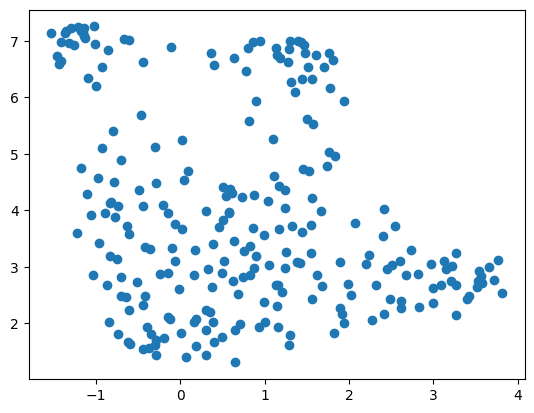

In [15]:
plt.scatter(dr_embed[:, 0], dr_embed[:, 1])
plt.show();

### Now get the classification scores

In [ ]:
text_data_list = text_data.tolist()

In [34]:
text_data_list

['Stocks To Watch in January—And What to Watch For',
 "Broadcom's chips, network will drive growth in 2025: Analyst",
 'These Are The 5 Best Dow Jones Stocks Of 2024',
 'These Stocks Moved the Most Today: Super Micro, Moderna, Nvidia, MicroStrategy, Tesla, Palantir, Sangamo, and More',
 'Stocks Cap Best Two Years in a Quarter-Century',
 "2024's year-end dip 'creates buying opportunity': Analyst",
 "Super Micro stock had a wild ride in 2024 — here's why",
 "NVIDIA Stock Slips 2% Despite Analysts Remain Bullish on AI Giant's Future",
 'Jim Cramer’s Insights on Taiwan Semiconductor (TSM): The Giant in Contract Chip Manufacturing',
 'Jim Cramer’s Take on NVIDIA (NVDA): The King of AI GPUs Under Pressure',
 "Nvidia's $65 Billion AI Boom: The Stock That's Too Big to Ignore",
 "Nvidia Wraps Up 2024 as S&P 500's Top Performer, Eyes AI Expansion in 2025",
 '1 Way the Magnificent 7 Stocks Disappointed in 2024',
 'Is Intel stock done going down?',
 'Stocks surged in 2024 even as Americans fretted

In [40]:
def classify(textc):
    enc = tokenizer(textc, return_tensors="pt", truncation=True, max_length=128, padding=True)

    enc_device(enc)

    with torch.no_grad():
        out = model_classify(**enc)
        logits = out.logits.squeeze(0)
        probs = F.softmax(logits, dim=-1)

    return probs, logits

probs, logits = classify(text_data_list)

probs.shape, logits.shape

(torch.Size([247, 3]), torch.Size([247, 3]))

In [52]:
import numpy as np

def get_sentioment_colors(probs):

    probs_np = probs.cpu().numpy()

    sentiment_class = np.argmax(probs_np, axis=1)

    sentiment_value = []

    for idx, cl in enumerate(sentiment_class):

        if cl == 0:
            base = 0.5
        if cl == 1:
            base = -0.5
        if cl == 2:
            base = -1
        
        # print(f"Sentiment class {cl}")

        # print(f"class confidence: {probs[idx, cl]}")

        # print(f"sentiment value: {base + probs[idx, cl]}")

        sentiment_value.append(base + probs_np[idx, cl]) 
    
    return np.array(sentiment_value)


sentiment_value = get_sentioment_colors(probs)

sentiment_value.shape

(247,)

In [87]:
def text_to_sentiment(textc):
    probs, logits = classify(textc)

    sentiment_value = get_sentioment_colors(probs)
    
    return sentiment_value

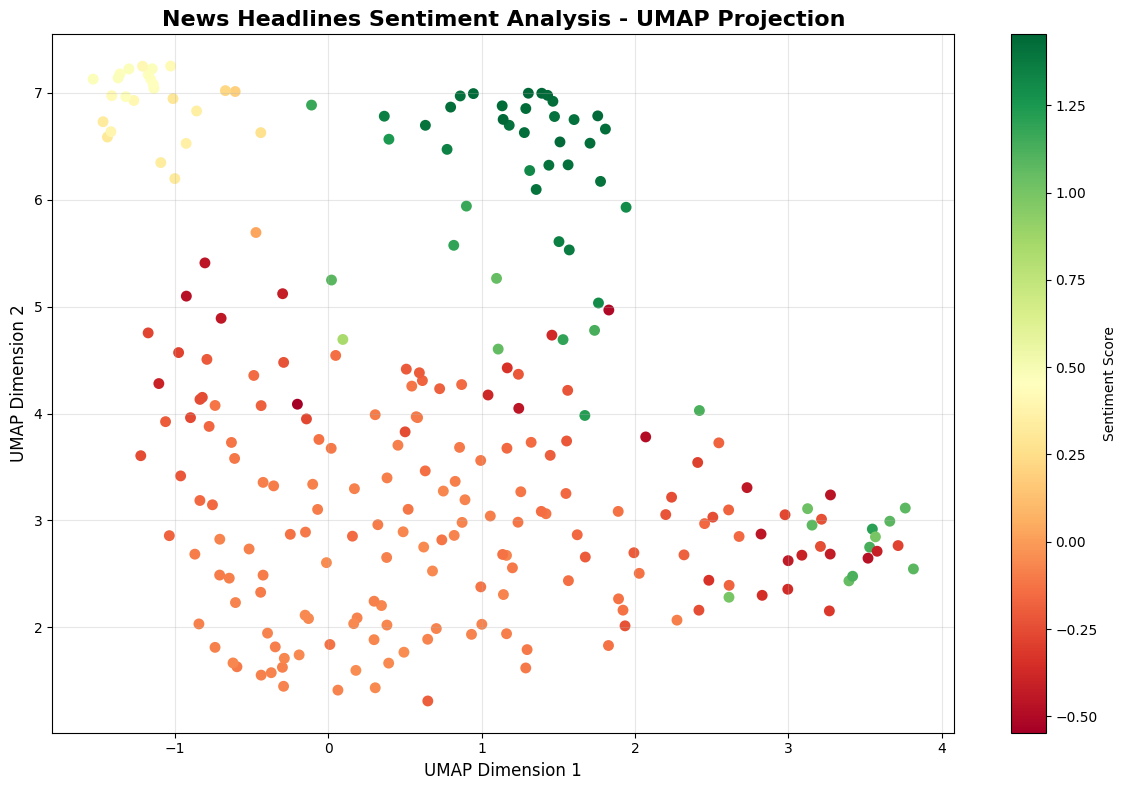

In [68]:
def plot_sentimate_reduction(dr_embed, sentiment_value, title = 'News Headlines Sentiment Analysis - UMAP Projection'):
    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(dr_embed[:, 0], dr_embed[:, 1],
                        c=sentiment_value,
                        cmap='RdYlGn',
                        s=40,
                        linewidth=1.5)

    plt.colorbar(scatter, label='Sentiment Score')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('UMAP Dimension 1', fontsize=12)
    plt.ylabel('UMAP Dimension 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_sentimate_reduction(dr_embed, sentiment_value)

In [84]:
text_data = df['summary'].values

embeddings_summary = [embed(text) for text in text_data]

demb_summary = torch.stack(embeddings_summary).squeeze()

text_data_summary_list = text_data.tolist()

demb_summary.shape

torch.Size([247, 768])

In [85]:
dr_summary_embed = make_umap(demb_summary)

dr_summary_embed.shape

/home/may33/miniconda3/envs/mlenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(247, 2)

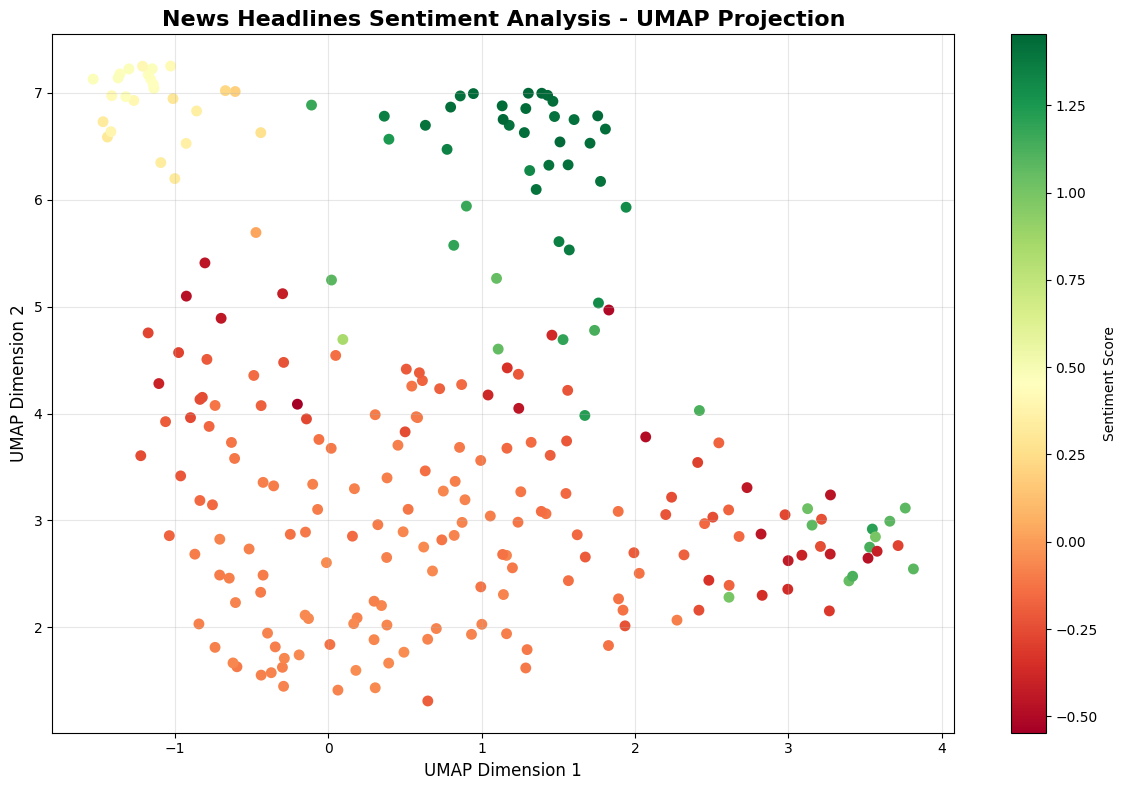

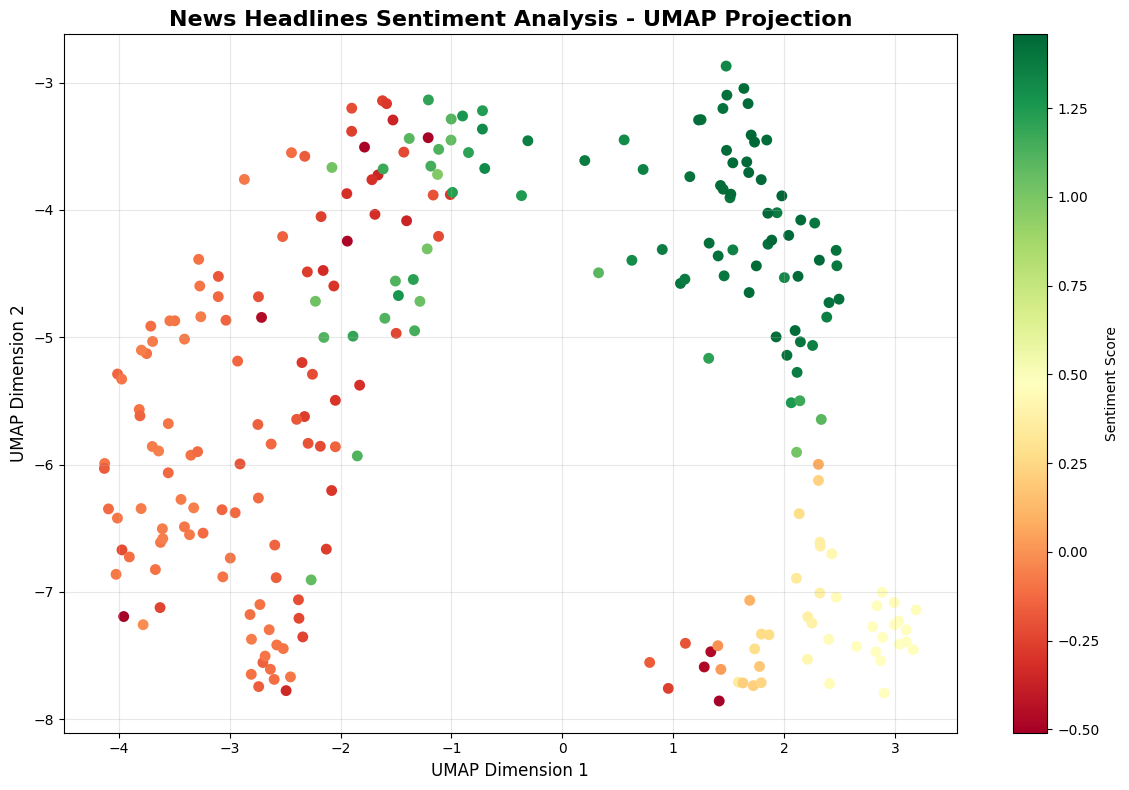

In [ ]:
plot_sentimate_reduction(dr_embed, sentiment_value)
plot_sentimate_reduction(dr_summary_embed, text_to_sentiment(text_data_summary_list), title='News Headlines Sentiment Analysis - UMAP Projection')